# Data Analyzing Cleaning

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing / sentiment analysis
from textblob import TextBlob


In [2]:
# Data import
data=pd.read_csv("data/cars_descriptions_with_details01.csv");

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3463 entries, 0 to 3462
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   car brand                            3463 non-null   object
 1   car model                            3463 non-null   object
 2   manufacturing year                   3463 non-null   int64 
 3   car full name                        3463 non-null   object
 4   url                                  3463 non-null   object
 5   strengths                            3463 non-null   object
 6   weaknesses                           3463 non-null   object
 7   rating                               3044 non-null   object
 8   full description                     3463 non-null   object
 9   word count for full description      3463 non-null   int64 
 10  GPT-2 summarization                  3463 non-null   object
 11  word count for  GPT-2 Summarization  3463 n

In [4]:
'''
Columns we do not need
1) url
2) car full name
3) word count for full description
4) GPT-2 summarization
5) word count for GPT-2 Summarization
6) keywords
'''
print(data.columns.tolist())
data.drop(columns=['url','car full name','word count for full description','GPT-2 summarization','word count for  GPT-2 Summarization','keywords'], inplace=True)
data.info()

['car brand', 'car model', 'manufacturing year', 'car full name', 'url', 'strengths', 'weaknesses', 'rating', 'full description', 'word count for full description', 'GPT-2 summarization', 'word count for  GPT-2 Summarization', 'keywords', 'engine_type', 'horsepower', 'torque', 'drive_system', 'transmission', 'length', 'height', 'overall width with mirrors', 'overall width without mirrors', 'curb weight', 'cargo capacity, all seats In place']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3463 entries, 0 to 3462
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   car brand                           3463 non-null   object
 1   car model                           3463 non-null   object
 2   manufacturing year                  3463 non-null   int64 
 3   strengths                           3463 non-null   object
 4   weaknesses                          3463 non-null   object

In [5]:
# Numeric columns to clean
'''
Convert columns that currently contain text + numbers into pure numeric values for analysis:

Horsepower → "120 hp @ 5,400 rpm" → 120
Torque → "140 lb-ft @ 3,500 rpm" → 140
Dimensions → length, height, overall width, curb weight, cargo capacity → remove units

'''

num_cols = [ 'horsepower', 'torque', 'length', 'height', 'overall width with mirrors', 'overall width without mirrors', 'curb weight', 'cargo capacity, all seats In place' ]

for col in num_cols:
    # Convert everything to string first
    data[col] = data[col].astype(str)

    # Remove commas, lowercase, strip spaces
    data[col] = data[col].str.replace(',', '', regex=True).str.lower().str.strip()

    # Extract first numeric value
    data[col] = data[col].str.extract(r'(\d+\.?\d*)')

    # Convert to numeric, NaN if fails
    data[col] = pd.to_numeric(data[col], errors='coerce')

    # Fill missing numeric values with median
    data[col].fillna(data[col].median(), inplace=True)


C:\Users\DAKSH LAKHI\AppData\Local\Temp\ipykernel_3672\2517457263.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\DAKSH LAKHI\AppData\Local\Temp\ipykernel_3672\2517457263.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [6]:
# Clean text columns for NLP/sentiment analysis
text_cols=['full description', 'strengths', 'weaknesses']
for col in text_cols:
    data[col]=data[col].astype(str).str.lower().str.strip()

In [7]:
# Make sure the column is string type
data['rating'] = data['rating'].astype(str)

# Extract the first number (decimal or integer) from each row
data['rating'] = data['rating'].str.extract(r'([\d\.]+)')

# Convert to float
data['rating'] = data['rating'].astype(float)

# Fill missing values with median
data['rating'].fillna(data['rating'].median(), inplace=True)

data.head(10)
#data['rating'].dtype

C:\Users\DAKSH LAKHI\AppData\Local\Temp\ipykernel_3672\3820960083.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['rating'].fillna(data['rating'].median(), inplace=True)


,car brand,car model,manufacturing year,strengths,weaknesses,rating,full description,engine_type,horsepower,torque,drive_system,transmission,length,height,overall width with mirrors,overall width without mirrors,curb weight,"cargo capacity, all seats In place"
0,jeep,jeep wrangler,1998,"['unmatched off-road capability, overflowing w...","['soft top is fun, but still a pain in the $%!...",4.3,jeep has improved off-road capability by incre...,Inline 4 cylinder,120.0,140.0,four wheel drive,5-speed manual,147.7,69.6,83.5,66.7,3045.0,11.1
1,toyota,toyota 4runner,2005,"['powerful engine lineup, well mannered on pav...","[""cargo capacity isn't much more than what man...",4.8,the base v6 now comes with a five-speed automa...,V6 cylinder,245.0,282.0,rear wheel drive,5-speed automatic,189.0,68.5,83.5,73.8,4045.0,36.6
2,toyota,toyota tundra,2002,"['silky v8, toyota build quality, less-than-fu...",['lacks wide range of choice offered by domest...,4.7,"sr5 models have new 16-inch wheels, and a limi...",V6 cylinder,190.0,220.0,rear wheel drive,5-speed manual,217.5,70.5,83.5,75.2,3795.0,16.7
3,toyota,toyota tacoma,1998,"['unique styling, toyota reliability, and powe...",['extended cab models lack a third door and th...,4.6,the 1998 four-wheel-drive tacomas receive fres...,Inline 4 cylinder,142.0,160.0,rear wheel drive,5-speed manual,203.1,62.0,83.5,66.5,3790.0,16.7
4,ford,ford ranger,1990,empty,empty,4.1,no changes for the ford ranger.,Inline 4 cylinder,100.0,133.0,four wheel drive,5-speed manual,188.5,63.6,83.5,66.8,3168.0,16.7
5,toyota,toyota avalon,1995,empty,empty,4.9,"marginally larger than the camry, the avalon i...",V6 cylinder,192.0,210.0,front wheel drive,4-speed automatic,190.2,56.1,83.5,70.3,3265.0,15.4
6,chevrolet,chevrolet camaro,2000,"['fun (base), fast (z28), furious (ss).']","['chrysler concorde front styling, cheapo inte...",4.6,"new interior colors and fabrics, redundant ste...",V6 cylinder,200.0,225.0,rear wheel drive,5-speed manual,193.5,51.8,83.5,74.1,3500.0,7.6
7,toyota,toyota camry,1998,"['reliable, well-built, and comfortable, the 1...",['boring shape. suspension is too soft.'],4.5,side-impact airbags debut on the 1998 toyota c...,V6 cylinder,194.0,209.0,front wheel drive,5-speed manual,188.5,55.4,83.5,70.1,3086.0,14.1
8,gmc,gmc savana,1996,empty,empty,4.2,the savana is a fully redesigned version of gm...,V6 cylinder,200.0,250.0,rear wheel drive,4-speed automatic,218.8,80.2,83.5,79.2,3790.0,16.7
9,chevrolet,chevrolet silverado-2500hd,2005,"['powerful engine lineup, multiple drivetrain ...","['spotty build quality, mediocre interior desi...",4.7,this year all heavy-duty silverados receive a ...,V8 cylinder,300.0,360.0,rear wheel drive,5-speed manual,227.7,76.2,83.5,79.7,5404.0,16.7


#### ✅ What’s Done

#####  Removed unnecessary columns → kept only the relevant ones for analysis, charts, and NLP.

#####  Cleaned rating column → extracted numeric value, converted to float, filled missing values with median.

#####  Cleaned other numeric columns (horsepower, torque, dimensions, weight, cargo capacity) → removed text/units, converted to numeric, filled missing values with median.

#####  Cleaned text columns (full description, strengths, weaknesses) → converted to lowercase, stripped leading/trailing spaces for NLP and sentiment analysis.

# Feature Preparation and Analysis

In [8]:
# Numeric Aggregation - because might have multiple rows for the same car model because each row is one expert review.
numeric_cols = ['rating', 'horsepower', 'torque', 'length', 'height',
                'overall width with mirrors', 'overall width without mirrors',
                'curb weight', 'cargo capacity, all seats In place']

avg_aspects=data.groupby(['car brand','car model'])[numeric_cols].mean().reset_index()
print(avg_aspects.head())

  car brand      car model    rating  horsepower      torque      length  \
0     acura      acura ilx  4.290000  185.700000  168.000000  181.180000   
1     acura  acura integra  4.823077  148.000000  130.384615  174.023077   
2     acura      acura mdx  4.300000  286.272727  267.772727  192.386364   
3     acura      acura nsx  4.910000  362.850000  296.500000  175.525000   
4     acura      acura rdx  4.256250  261.500000  261.812500  183.806250   

      height  overall width with mirrors  overall width without mirrors  \
0  55.600000                   83.500000                      70.600000   
1  52.153846                   83.500000                      67.715385   
2  67.904545                   82.640909                      77.172727   
3  47.460000                   84.640000                      72.150000   
4  65.437500                   83.500000                      73.937500   

   curb weight  cargo capacity, all seats In place  
0  3047.900000                         

In [9]:
data.head()

,car brand,car model,manufacturing year,strengths,weaknesses,rating,full description,engine_type,horsepower,torque,drive_system,transmission,length,height,overall width with mirrors,overall width without mirrors,curb weight,"cargo capacity, all seats In place"
0,jeep,jeep wrangler,1998,"['unmatched off-road capability, overflowing w...","['soft top is fun, but still a pain in the $%!...",4.3,jeep has improved off-road capability by incre...,Inline 4 cylinder,120.0,140.0,four wheel drive,5-speed manual,147.7,69.6,83.5,66.7,3045.0,11.1
1,toyota,toyota 4runner,2005,"['powerful engine lineup, well mannered on pav...","[""cargo capacity isn't much more than what man...",4.8,the base v6 now comes with a five-speed automa...,V6 cylinder,245.0,282.0,rear wheel drive,5-speed automatic,189.0,68.5,83.5,73.8,4045.0,36.6
2,toyota,toyota tundra,2002,"['silky v8, toyota build quality, less-than-fu...",['lacks wide range of choice offered by domest...,4.7,"sr5 models have new 16-inch wheels, and a limi...",V6 cylinder,190.0,220.0,rear wheel drive,5-speed manual,217.5,70.5,83.5,75.2,3795.0,16.7
3,toyota,toyota tacoma,1998,"['unique styling, toyota reliability, and powe...",['extended cab models lack a third door and th...,4.6,the 1998 four-wheel-drive tacomas receive fres...,Inline 4 cylinder,142.0,160.0,rear wheel drive,5-speed manual,203.1,62.0,83.5,66.5,3790.0,16.7
4,ford,ford ranger,1990,empty,empty,4.1,no changes for the ford ranger.,Inline 4 cylinder,100.0,133.0,four wheel drive,5-speed manual,188.5,63.6,83.5,66.8,3168.0,16.7


In [10]:
data.columns

Index(['car brand', 'car model', 'manufacturing year', 'strengths',
       'weaknesses', 'rating', 'full description', 'engine_type', 'horsepower',
       'torque', 'drive_system', 'transmission', 'length', 'height',
       'overall width with mirrors', 'overall width without mirrors',
       'curb weight', 'cargo capacity, all seats In place'],
      dtype='object')

#### ✅ What’s Done
##### 1) Numeric Aggregation (avg_aspects)

# Data Visualization

C:\Users\DAKSH LAKHI\AppData\Local\Temp\ipykernel_3672\878227355.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_rating.values, y=brand_rating.index, palette="viridis")


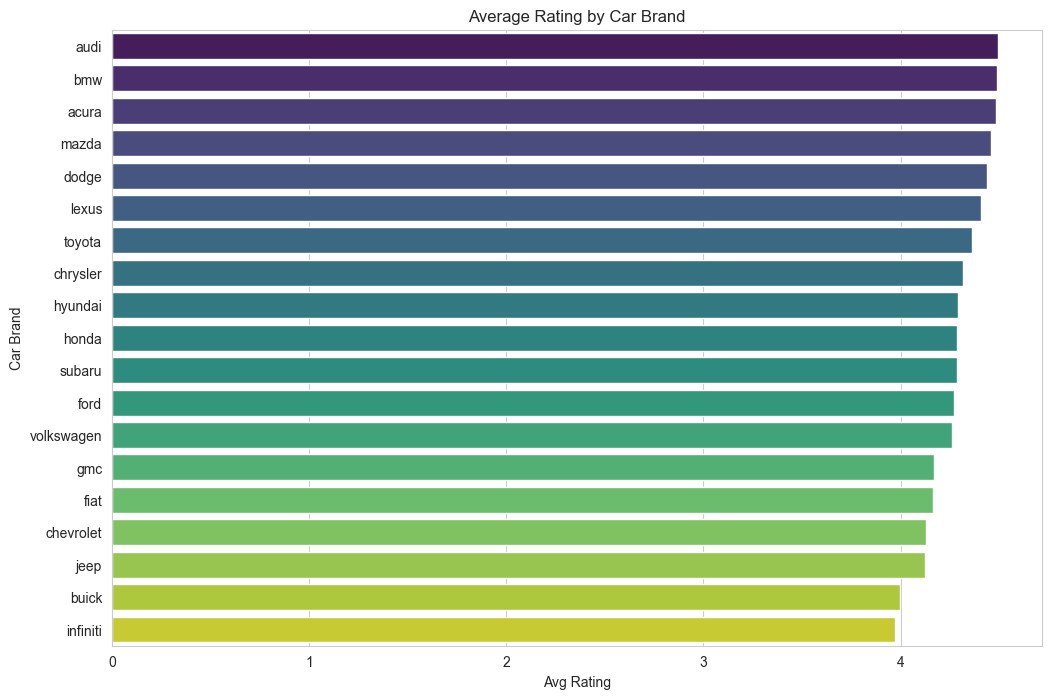

In [11]:
# Average Rating by Car Brand
brand_rating = avg_aspects.groupby("car brand")["rating"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,8))  # taller for vertical
sns.barplot(x=brand_rating.values, y=brand_rating.index, palette="viridis")
plt.title("Average Rating by Car Brand")
plt.xlabel("Avg Rating")
plt.ylabel("Car Brand")
plt.show()



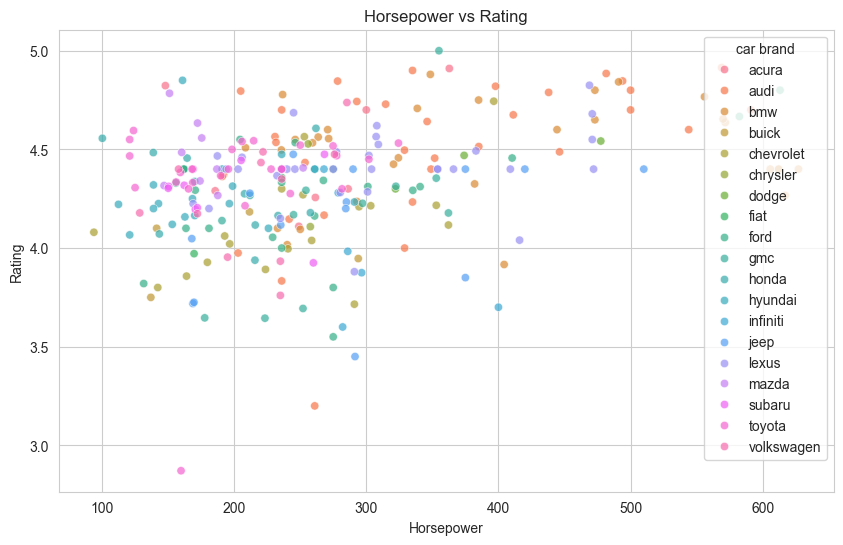

In [12]:
# Horsepower vs Rating
plt.figure(figsize=(10,6))
sns.scatterplot(data=avg_aspects, x="horsepower", y="rating", hue="car brand", alpha=0.7)
plt.title("Horsepower vs Rating")
plt.xlabel("Horsepower")
plt.ylabel("Rating")
plt.show()

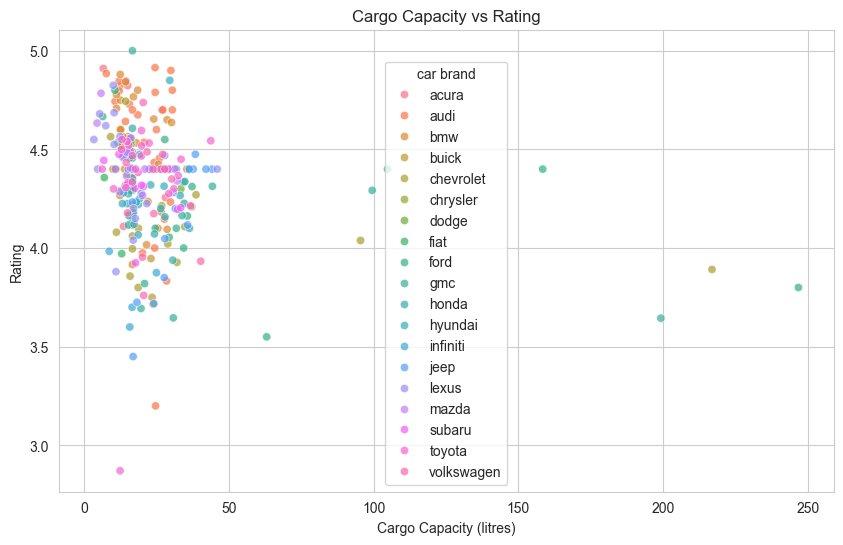

In [13]:
# Cargo Capacity vs Rating
plt.figure(figsize=(10,6))
sns.scatterplot(data=avg_aspects, x="cargo capacity, all seats In place", y="rating", hue="car brand", alpha=0.7)
plt.title("Cargo Capacity vs Rating")
plt.xlabel("Cargo Capacity (litres)")
plt.ylabel("Rating")
plt.show()


C:\Users\DAKSH LAKHI\AppData\Local\Temp\ipykernel_3672\2043352641.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cars, x="rating", y="car model", palette="viridis")


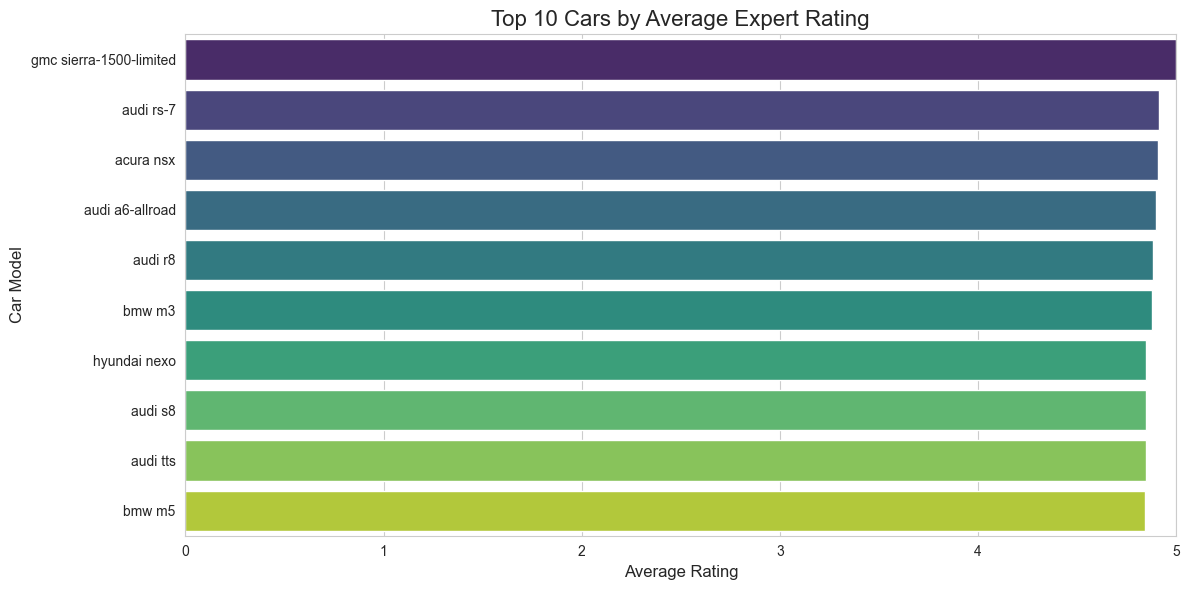

In [14]:
# Get top 10 cars by average rating
top_cars = data.groupby("car model")["rating"].mean().reset_index()
top_cars = top_cars.sort_values(by="rating", ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=top_cars, x="rating", y="car model", palette="viridis")

plt.title("Top 10 Cars by Average Expert Rating", fontsize=16)
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("Car Model", fontsize=12)
plt.xlim(0, 5)  # adjust if rating scale is different
plt.tight_layout()
plt.show()


C:\Users\DAKSH LAKHI\AppData\Local\Temp\ipykernel_3672\461839656.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="transmission_simplified", y="rating", palette="Set2")


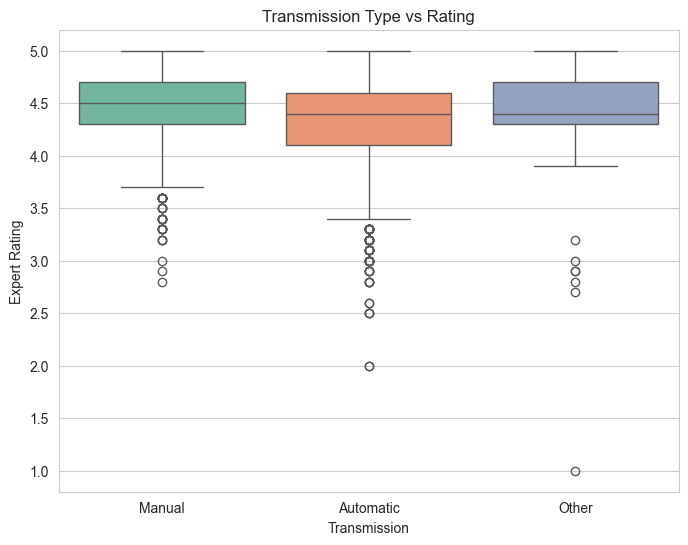

In [15]:
# Simplify transmission values
def simplify_transmission(x):
    x = str(x).lower()
    if "auto" in x:
        return "Automatic"
    elif "manual" in x:
        return "Manual"
    else:
        return "Other"

data["transmission_simplified"] = data["transmission"].apply(simplify_transmission)


plt.figure(figsize=(8,6))
sns.boxplot(data=data, x="transmission_simplified", y="rating", palette="Set2")
plt.title("Transmission Type vs Rating")
plt.xlabel("Transmission")
plt.ylabel("Expert Rating")
plt.show()


C:\Users\DAKSH LAKHI\AppData\Local\Temp\ipykernel_3672\2031689479.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data,x="engine_simple", y="rating", estimator=np.mean, ci=None, palette="coolwarm")
C:\Users\DAKSH LAKHI\AppData\Local\Temp\ipykernel_3672\2031689479.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data,x="engine_simple", y="rating", estimator=np.mean, ci=None, palette="coolwarm")


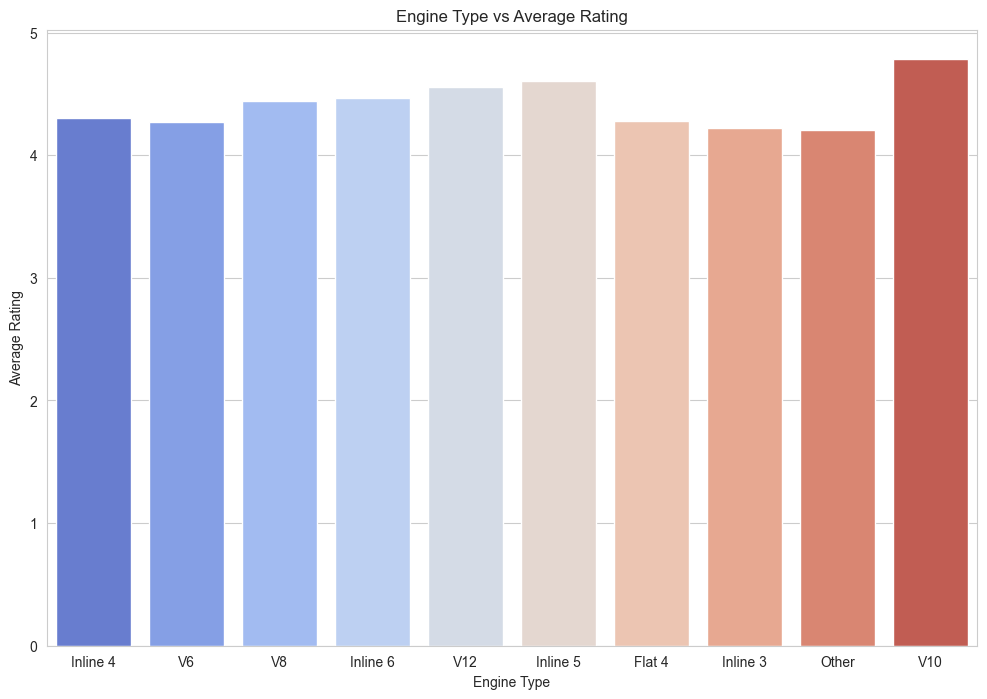

In [16]:
def simplify_engine_cyl(x):
    x = str(x).lower()
    if "inline 3" in x:
        return "Inline 3"
    elif "inline 4" in x:
        return "Inline 4"
    elif "inline 5" in x:
        return "Inline 5"
    elif "inline 6" in x:
        return "Inline 6"
    elif "v6" in x:
        return "V6"
    elif "v8" in x:
        return "V8"
    elif "v10" in x:
        return "V10"
    elif "v12" in x:
        return "V12"
    elif "flat 4" in x:
        return "Flat 4"
    else:
        return "Other"

data["engine_simple"] = data["engine_type"].apply(simplify_engine_cyl)

data["engine_simple"] = data["engine_type"].apply(simplify_engine_cyl)
plt.figure(figsize=(12,8))
sns.barplot(data=data,x="engine_simple", y="rating", estimator=np.mean, ci=None, palette="coolwarm")
plt.title("Engine Type vs Average Rating")
plt.xlabel("Engine Type")
plt.ylabel("Average Rating")
plt.show()

C:\Users\DAKSH LAKHI\AppData\Local\Temp\ipykernel_3672\745477477.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="drive_system", y="rating", palette="muted")


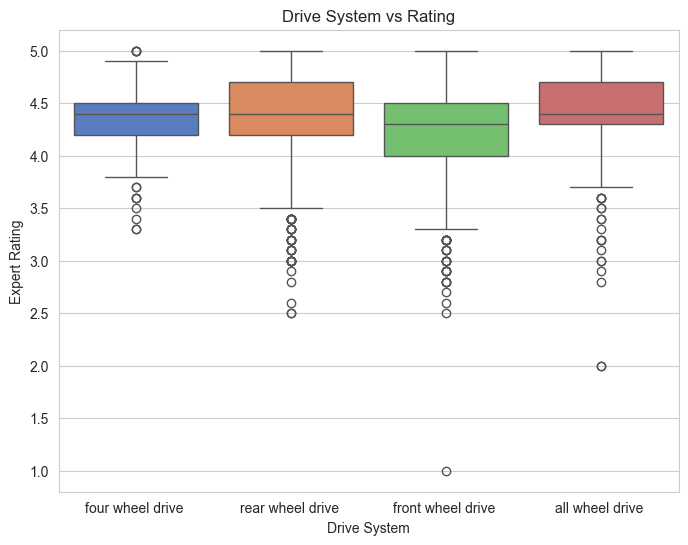

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x="drive_system", y="rating", palette="muted")
plt.title("Drive System vs Rating")
plt.xlabel("Drive System")
plt.ylabel("Expert Rating")
plt.show()


([<matplotlib.axis.XTick at 0x226049eca50>,
 [Text(2000, 0, '2000'),
  Text(2002, 0, '2002'),
  Text(2004, 0, '2004'),
  Text(2006, 0, '2006'),
  Text(2008, 0, '2008'),
  Text(2010, 0, '2010'),
  Text(2012, 0, '2012'),
  Text(2014, 0, '2014'),
  Text(2016, 0, '2016'),
  Text(2018, 0, '2018'),
  Text(2020, 0, '2020'),
  Text(2022, 0, '2022'),
  Text(2024, 0, '2024')])

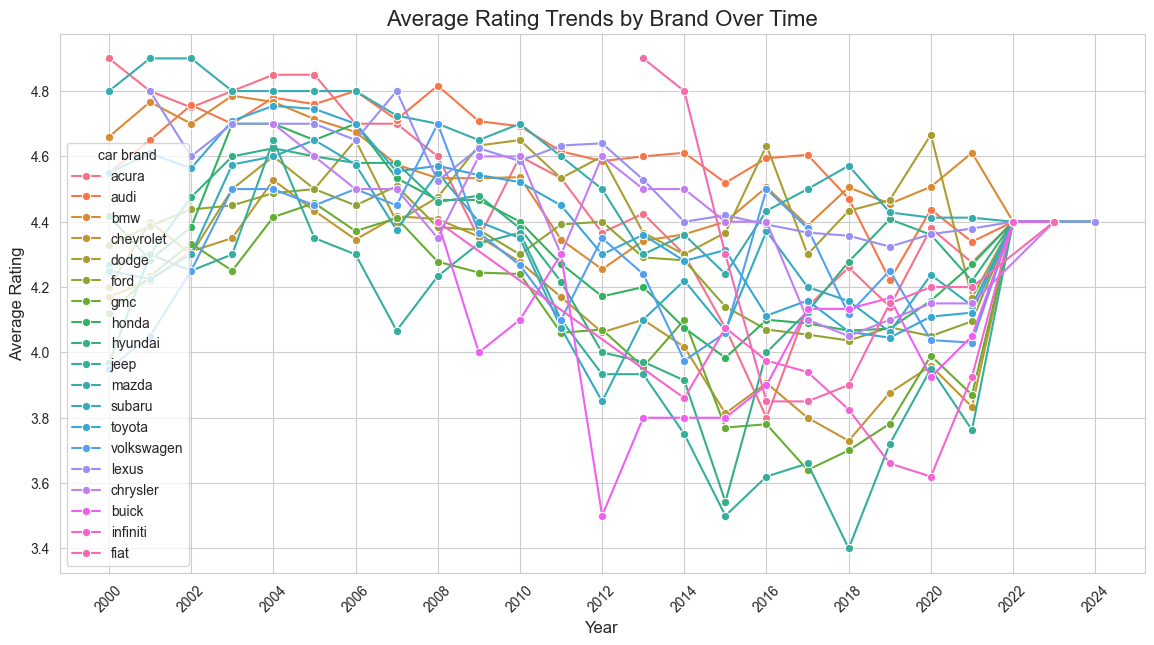

In [18]:
# Group by year and brand
yearly_brand_avg = data.groupby(["manufacturing year", "car brand"])["rating"].mean().reset_index()

# Optional: filter years if you want (e.g., 2000-2025)
yearly_brand_avg = yearly_brand_avg[(yearly_brand_avg["manufacturing year"] >= 2000) &
                                    (yearly_brand_avg["manufacturing year"] <= 2025)]

plt.figure(figsize=(14,7))
sns.lineplot(data=yearly_brand_avg, x="manufacturing year", y="rating", hue="car brand", marker="o")

plt.title("Average Rating Trends by Brand Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)

# Make x-axis readable
plt.xticks(yearly_brand_avg["manufacturing year"].unique()[::2], rotation=45)  # every 2nd year

### Insights from Data Visualization

#### Average Rating by Car Brand
- Some brands consistently receive higher expert ratings than others, highlighting the real impact of brand reputation on expert reviews.

#### Horsepower vs Rating
- Cars with more horsepower tend to get slightly better ratings, but high horsepower alone doesn’t guarantee top scores.

#### Cargo Capacity vs Rating
- Vehicles with larger cargo capacity do not necessarily achieve higher expert ratings, showing that size alone isn’t a key factor for expert appeal.

#### Top 10 Cars by Average Expert Rating
- A few standout car models dominate the top ratings, helping buyers quickly identify the highest-praised options.

#### Transmission Type vs Rating
- Automatic transmissions generally receive higher ratings than manual or other types, suggesting comfort and convenience influence expert perception.

#### Engine Type vs Average Rating
- V6 and V8 engines often earn better ratings than smaller Inline 4s, indicating that engine configuration impacts expert evaluation.

#### Drive System vs Rating
- All-wheel drive (AWD) vehicles tend to receive higher expert ratings than front- or rear-wheel drive, guiding performance-focused buyers.

#### Average Rating Trends by Brand Over Time
- Expert ratings for some brands have steadily improved or declined over the years, allowing buyers to focus on brands with consistent quality year over year.


In [19]:
data.columns

Index(['car brand', 'car model', 'manufacturing year', 'strengths',
       'weaknesses', 'rating', 'full description', 'engine_type', 'horsepower',
       'torque', 'drive_system', 'transmission', 'length', 'height',
       'overall width with mirrors', 'overall width without mirrors',
       'curb weight', 'cargo capacity, all seats In place',
       'transmission_simplified', 'engine_simple'],
      dtype='object')

In [20]:
data.to_csv("data/my_cars.csv")